<a href="https://colab.research.google.com/github/himanshu530/Machine-Learning/blob/master/convolutiona_and_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [12]:
def draw_image(img,title="Image"):
  plt.imshow(img,cmap="gray")
  plt.axis("off")
  plt.title(title + str(img.shape))
  plt.show()

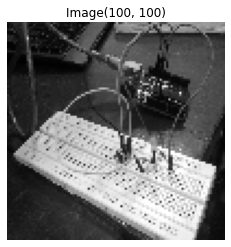

In [13]:
img = cv2.imread('/content/ass_1.jpg')
img = cv2.resize(img,(100,100))
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)   # to convert into 2d array
draw_image(img_gray)   

In [17]:
#Hardcoded filters

def convolution(img,img_filter):
  # These filters are learned by the nueral network but we are using hardcoded filters

  W = img.shape[0]
  H = img.shape[0]

  F = img_filter.shape[0]
  
  new_img = np.zeros((W-F+1,H-F+1))

  for row in range(W-F+1):
    for col in range(H-F+1):
      for i in range(F):
        for j in range(F):
          new_img[row][col] += img[row+i][col+j]*img_filter[i][j]
        
        if new_img[row][col]>255:
          new_img[row][col] = 255
        
        elif new_img[row][col]<0:
          new_img[row][col] = 0

  return new_img #Activation map



In [15]:
blur_filter = np.ones((3,3))/9.0 
print(blur_filter)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [19]:
output1 = convolution(img_gray,blur_filter)
output1

array([[ 23.11111111,  31.88888889,  37.33333333, ..., 151.44444444,
        151.33333333, 150.22222222],
       [ 29.22222222,  34.55555556,  36.88888889, ..., 157.55555556,
        159.33333333, 158.66666667],
       [ 26.66666667,  33.55555556,  35.11111111, ..., 153.66666667,
        156.33333333, 155.88888889],
       ...,
       [ 30.22222222,  31.33333333,  32.11111111, ...,  15.11111111,
         14.44444444,  14.        ],
       [ 32.77777778,  33.33333333,  34.66666667, ...,  14.77777778,
         14.55555556,  14.77777778],
       [ 33.66666667,  34.11111111,  34.55555556, ...,  15.        ,
         14.77777778,  14.77777778]])

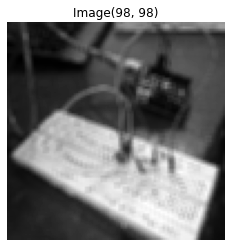

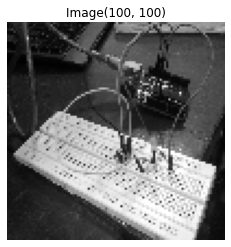

(None, None)

In [23]:
draw_image(output1), draw_image(img_gray)

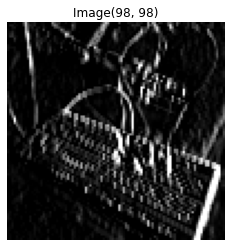

In [24]:
edge_filter = np.array(([1,0,-1],
                        [1,0,-1],
                        [1,0,-1]))

output2 = convolution(img_gray,edge_filter)

draw_image(output2)

## **Convolution layer in CNN**


1.   Contains various filters
2.   each filter extracts different kinds of features and give     give activation map
3.   CNN layer takes input a volume and produces output volume of different shape
 


Building Classifier using keras

In [2]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

In [3]:
# Data preparation

x = pd.read_csv('/content/fashion-mnist_test.csv')

X_ = np.array(x)
X = X_[:,1:]
X = X/255.0 

y = X_[:,0]

print(X.shape,y.shape)

(10000, 784) (10000,)


In [4]:
X_train = X.reshape((-1,28,28,1))
Y_train = np_utils.to_categorical(y)

print(X_train.shape,Y_train.shape)

(10000, 28, 28, 1) (10000, 10)


In [5]:
import matplotlib.pyplot as plt


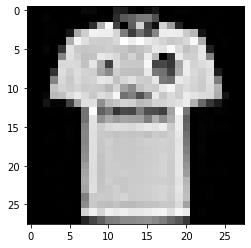

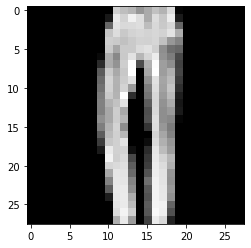

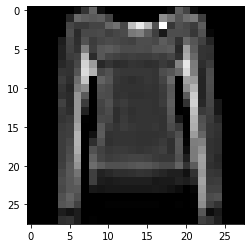

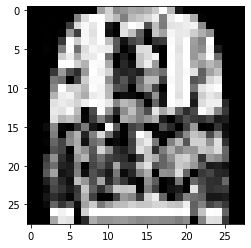

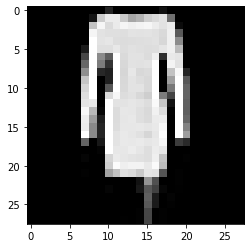

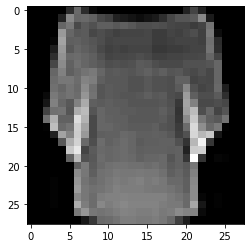

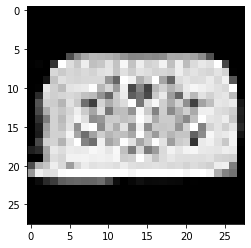

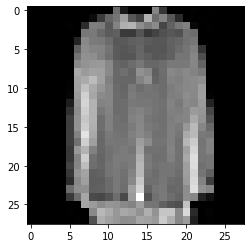

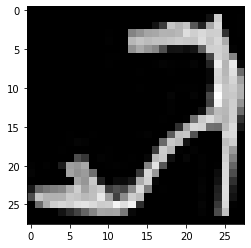

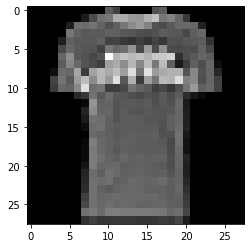

In [8]:
for i in range(10):
  plt.figure(i)
  plt.imshow(X_train[i].reshape(28,28),cmap="gray")
  plt.show()

## CNN Model

In [9]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))  #Only need to specify input shape only for first layer
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))

model.add(MaxPooling2D(2,2))

model.add(Convolution2D(32,(5,5),activation='relu',))

model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())  # converts 3d into layer

model.add(Dense(10,activation='softmax'))  # 10 nuerons because 10 classes in the output , softmax for probabilities

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [10]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [11]:
hist = model.fit(X_train,Y_train,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)


Epoch 1/20
32/32 [==============================] - 29s 866ms/step - loss: 1.9609 - accuracy: 0.3626 - val_loss: 0.8895 - val_accuracy: 0.6975
Epoch 2/20
32/32 [==============================] - 28s 862ms/step - loss: 0.8105 - accuracy: 0.7194 - val_loss: 0.7334 - val_accuracy: 0.7290
Epoch 3/20
32/32 [==============================] - 27s 850ms/step - loss: 0.6694 - accuracy: 0.7485 - val_loss: 0.6763 - val_accuracy: 0.7555
Epoch 4/20
32/32 [==============================] - 27s 852ms/step - loss: 0.6216 - accuracy: 0.7717 - val_loss: 0.5693 - val_accuracy: 0.7980
Epoch 5/20
32/32 [==============================] - 27s 847ms/step - loss: 0.5371 - accuracy: 0.8014 - val_loss: 0.5337 - val_accuracy: 0.8100
Epoch 6/20
32/32 [==============================] - 27s 849ms/step - loss: 0.4877 - accuracy: 0.8263 - val_loss: 0.5300 - val_accuracy: 0.8295
Epoch 7/20
32/32 [==============================] - 27s 844ms/step - loss: 0.4800 - accuracy: 0.8279 - val_loss: 0.4937 - val_accuracy: 0.8420